In [1]:
import numpy as np
import pandas as pd

In [2]:
import scanpy as sc

In [3]:
from scanpro import scanpro, anova, t_test
from scanpro.linear_model import create_design
from scanpro.get_transformed_props import get_transformed_props

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Load the subset file
adata = sc.read("/rds/general/user/tf424/ephemeral/97/03_pmc_oligo_87_reann.h5ad")

In [6]:
# Check the column names
print(adata.obs.columns)

Index(['sample_id', 'participant_id', 'cell_type', 'barcode', 'brain_region',
       'sex', 'path_braak_lb', 'diagnosis_at_baseline', 'diagnosis_latest',
       'case_control_other_at_baseline', 'case_control_other_latest', 'study',
       'study_participant_id', 'diagnosis', 'leiden_res_0.10',
       'leiden_res_0.12', 'leiden_res_0.14', 'leiden_res_0.16', 'subtype'],
      dtype='object')


In [12]:
# Rename diagnosis labels
adata.obs['diagnosis_latest'] = adata.obs['diagnosis_latest'].replace({
    "No PD Nor Other Neurological Disorder": "HC",
    "Parkinson's Disease": "PD"
})

In [7]:
out = scanpro(adata, clusters_col="subtype", samples_col="participant_id", conds_col="diagnosis", transform='logit')

out.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


,baseline_props,mean_props_PD,mean_props_HC,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Oligo 1,0.160145,0.151232,0.187939,0.804691,-1.752847,0.083150,0.166299
Oligo 2,0.815834,0.826616,0.778648,1.061604,2.608440,0.010704,0.042816
Oligo 3,0.013722,0.017457,0.015146,1.152532,-0.658841,0.511737,0.577564
Oligo 4,0.010299,0.004695,0.018267,0.256998,-0.559049,0.577564,0.577564


In [8]:
out.props

subtype,Oligo 1,Oligo 2,Oligo 3,Oligo 4
participant_id,,,,
PM-HA_S00447,0.157480,0.818898,0.023622,0.0
PM-HA_S00781,0.115683,0.878561,0.005755,0.0
PM-HA_S01646,0.115694,0.868964,0.015342,0.0
PM-HA_S01667,0.174856,0.812380,0.012763,0.0
PM-HA_S02252,0.160021,0.828017,0.011962,0.0
...,...,...,...,...
PM-UM_HCTYE,0.170047,0.808892,0.021061,0.0
PM-UM_HCTZZL,0.198228,0.796193,0.005579,0.0
PM-UM_HCTZZM,0.117963,0.873081,0.008956,0.0


Figure(1200x1150)


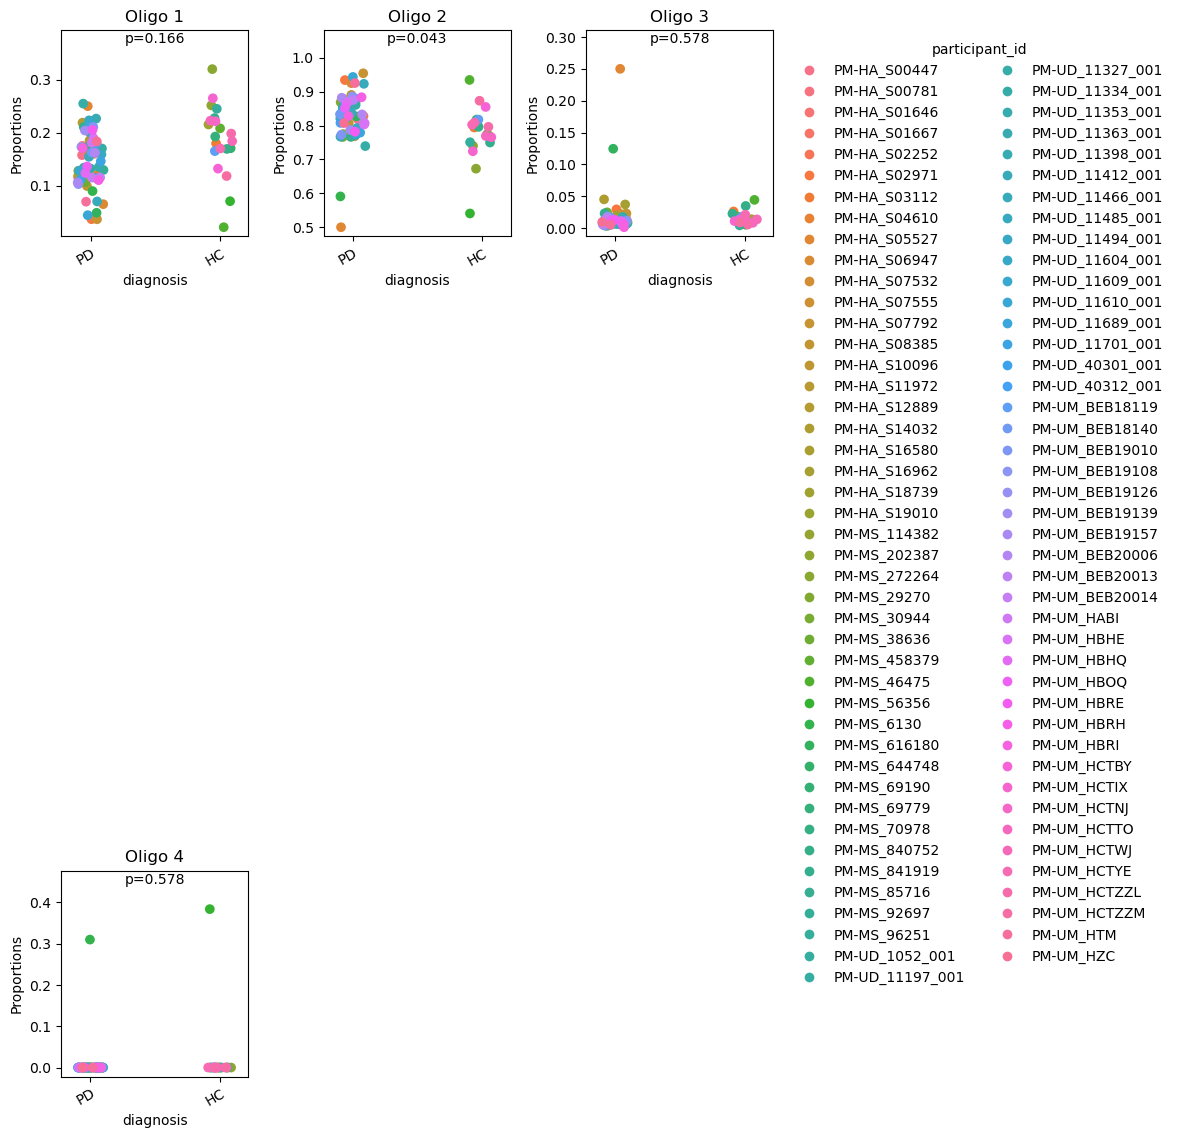

In [12]:
fig = out.plot()

fig = plt.gcf() 

fig.set_size_inches(12, 11.5)

# Improve layout
plt.tight_layout()
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')
print(fig)

plt.savefig("oligo_clusters.pdf", bbox_inches="tight")

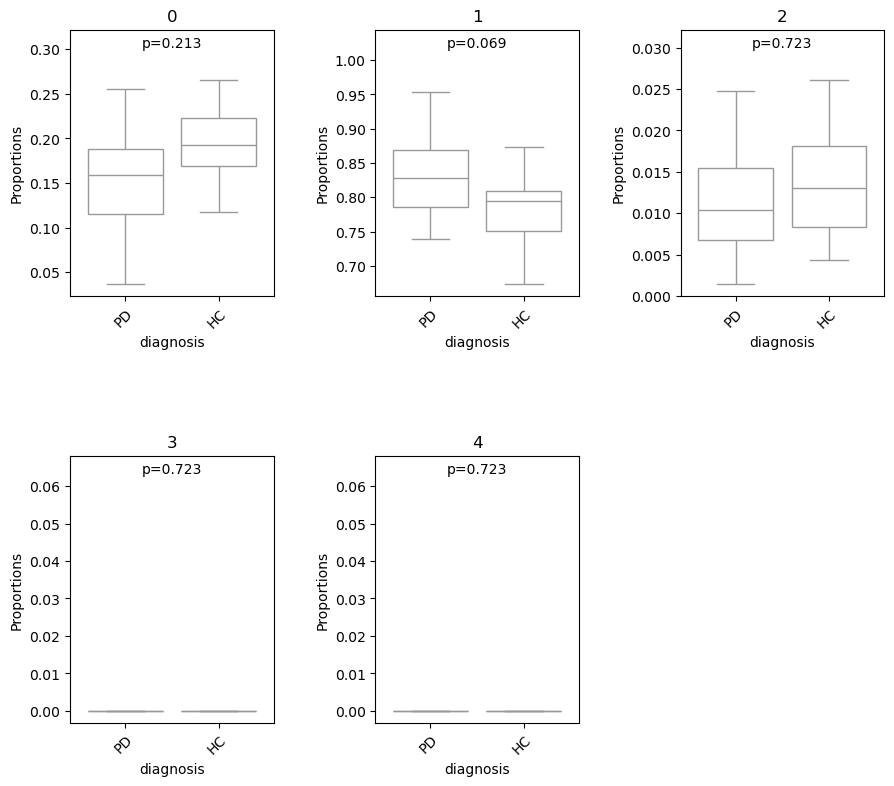

In [10]:
out.plot(kind="boxplot")

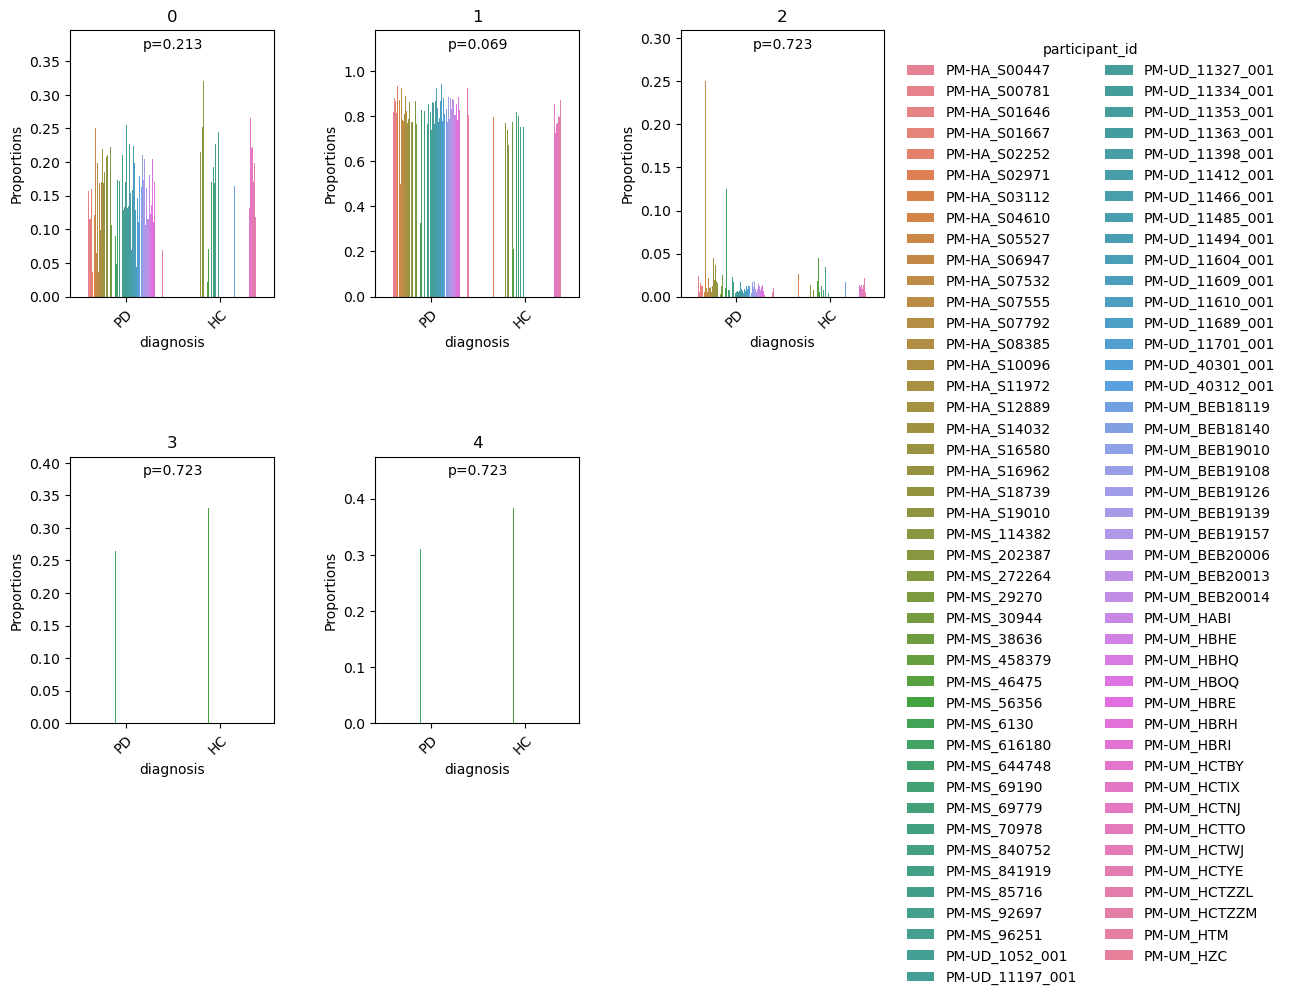

In [11]:
out.plot(kind="barplot")

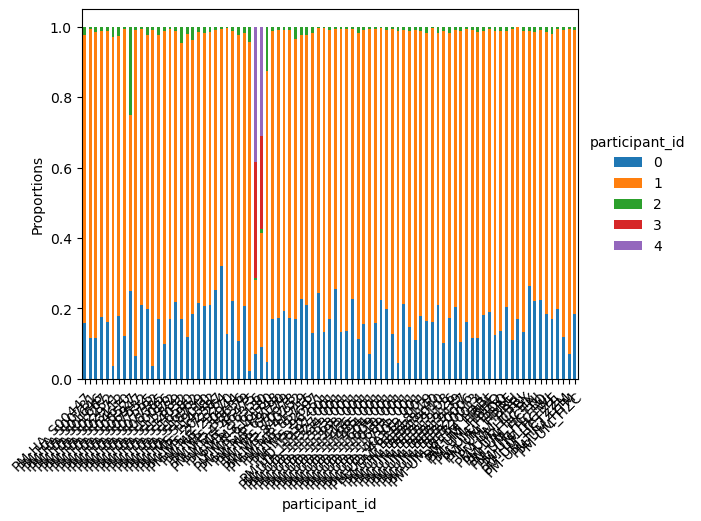

In [12]:
out.plot_samples(stacked=True)

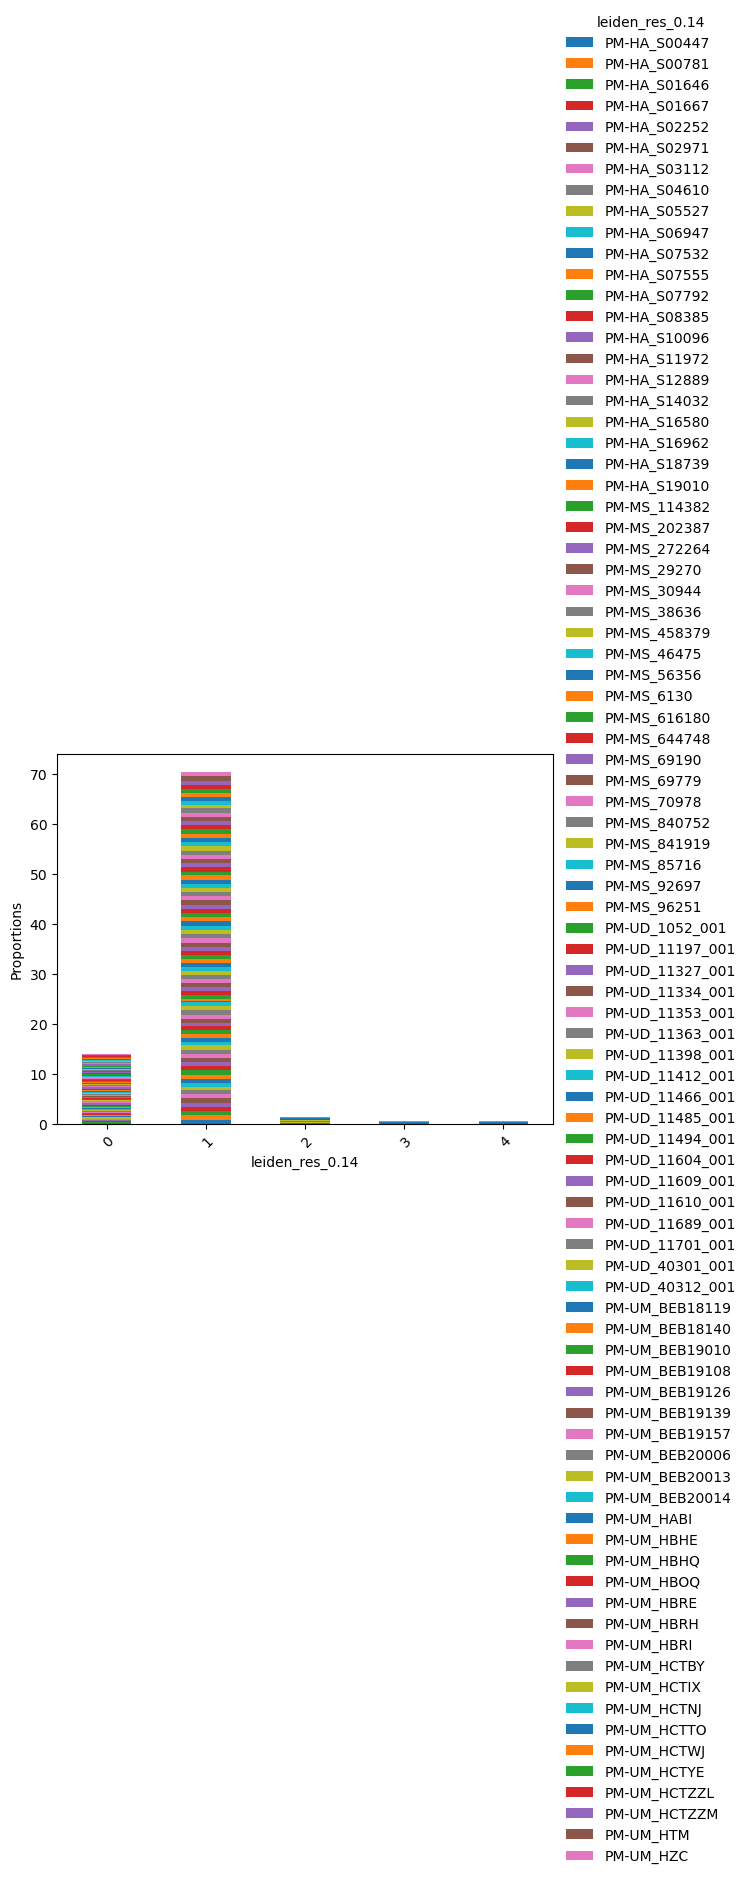

In [13]:
out.plot_samples(x="clusters")